## Companion notebook for "Enhancing reproducibility in bioimage analysis: focus on controls and effect sizes, not just p-values"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Enhancing reproducibility in bioimage analysis: focus on controls
and effect sizes, not just p-values".

If you are interested in taking a look at the original images of Fascin knockdown (KD) HeLa cells under different experimental conditions from [Lawson et al., 2022](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9427113/), these are freely available on the [Image Data Resource](https://idr.openmicroscopy.org) under accession number IDR0139. We selected specific wells (Fig. 2-3: J05, O02, E22, L08; Fig. 4: J05, I19, G15, O02, B02, N12, L08, L18, H13, E22, H10, B06) from plate number 1093711385 for use in this work.

We took into consideration three channels for each image: cell nuclei (Hoescht), Fascin and actin. Moreover, we compared data from specific pharmacological compounds (Fig. 1-3: SN0212398523; Fig. 4: SN0212398523, SN1066932540, SN1054616339), with three controls: untreated (negative control), DMSO (vehicle control), and Leptomycin b (positive control). Image analysis was performed in CellProfiler, with a pipeline available in associated [GitHub repo](https://github.com/djpbarry/dont-trust-p-values).

#### Import utility functions

In [1]:
from utility_functions import *

#### Set up parameters for plots

In [2]:
plt.rcParams['font.size'] = 26
plt.rcParams['axes.linewidth'] = 2
color_dict = {'SN1066932540': 'red',
              'SN1054616339': 'yellow',
              'SN0212398523': 'orange',
              'Untreated': 'blue',
              'DMSO': 'gray',
              'Leptomycin b': 'purple'}
y_label = 'Relative Nuclear Fascin Localisation'

#### Set up variables

In [3]:
plate_number = 1093711385
treatment_col = 'Treatment'
variable_of_interest = 'Fascin_Ratio'
idr_annotations_file_path = '../inputs/idr/idr0139-screenA-annotation.csv'
directories = ('../inputs/idr', '../outputs/plots', '../outputs/data')

#### Load CellProfile analysis output

In [4]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_number)
compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Proprietary Compound'].to_dict()
treatments_to_compounds = {'Treated': 'Treated', 'Negative Control': 'Untreated',
                           'Neutral Control': 'DMSO', 'Stimulator Control': 'Leptomycin b'}
image_data = pd.read_csv('../inputs/cell_profiler_outputs/Image.csv')
nuc_data = pd.read_csv('../inputs/cell_profiler_outputs/Nuclei.csv')
cyto_data = pd.read_csv('../inputs/cell_profiler_outputs/Cytoplasm.csv')
treatments = annotations.set_index('Well')['Control Type'].to_dict()

#### Select data subsets

In [5]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds, compounds,
                           ['J05', 'O02', 'E22', 'L08'])

#### Plot figures
##### Figure 2A-F

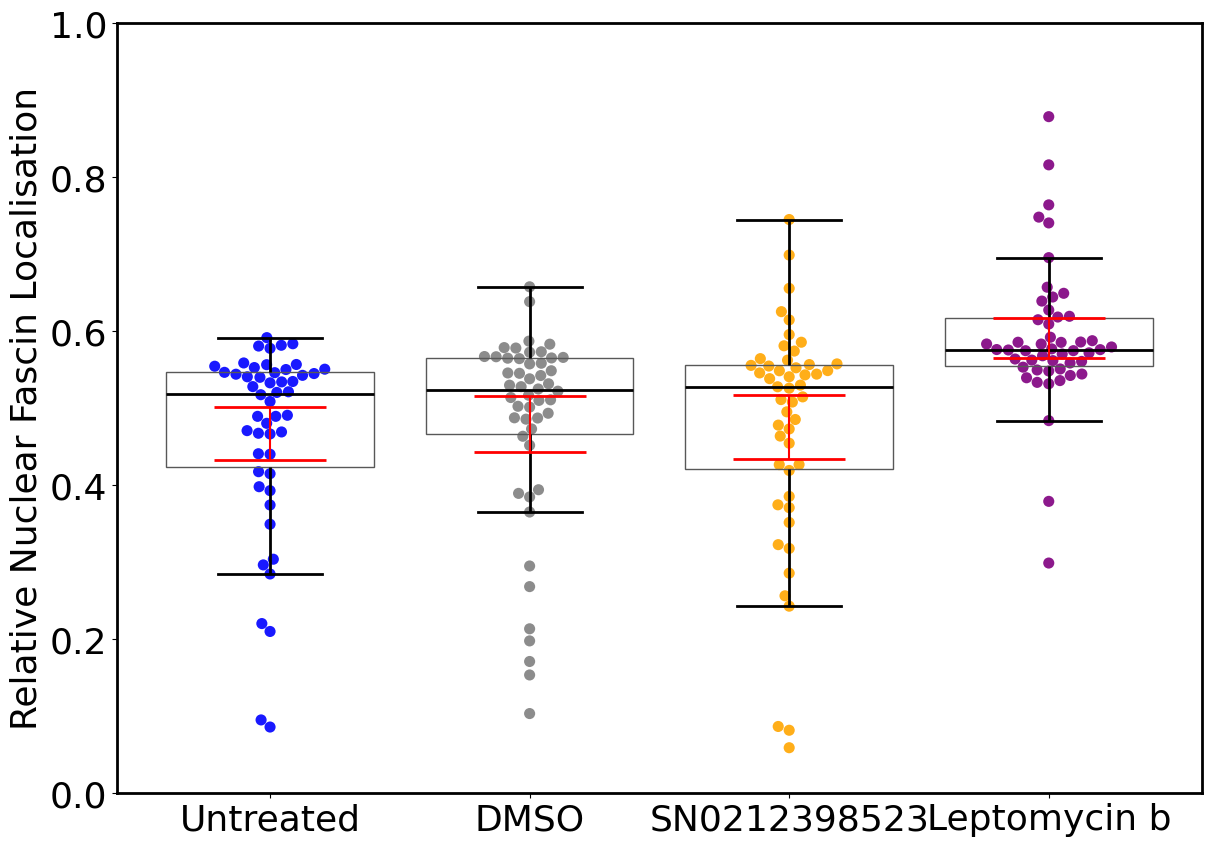

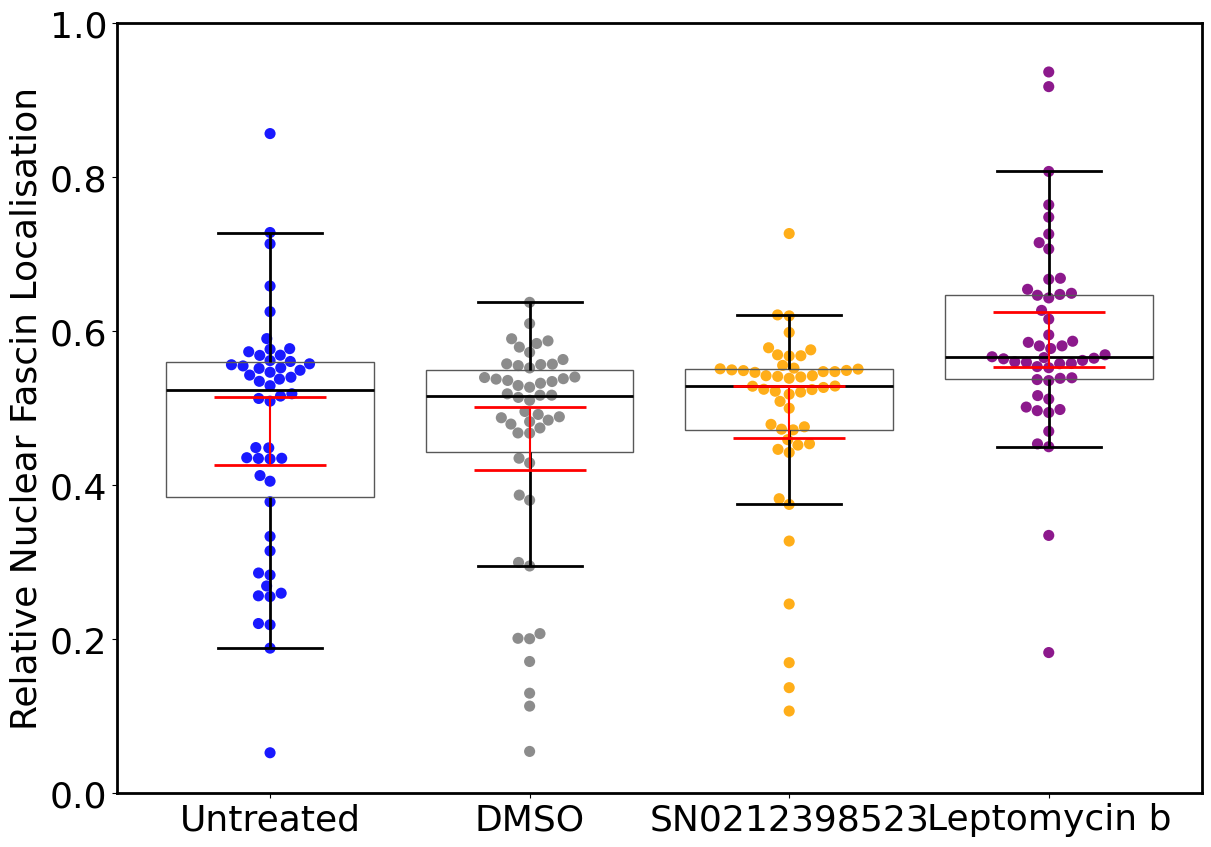

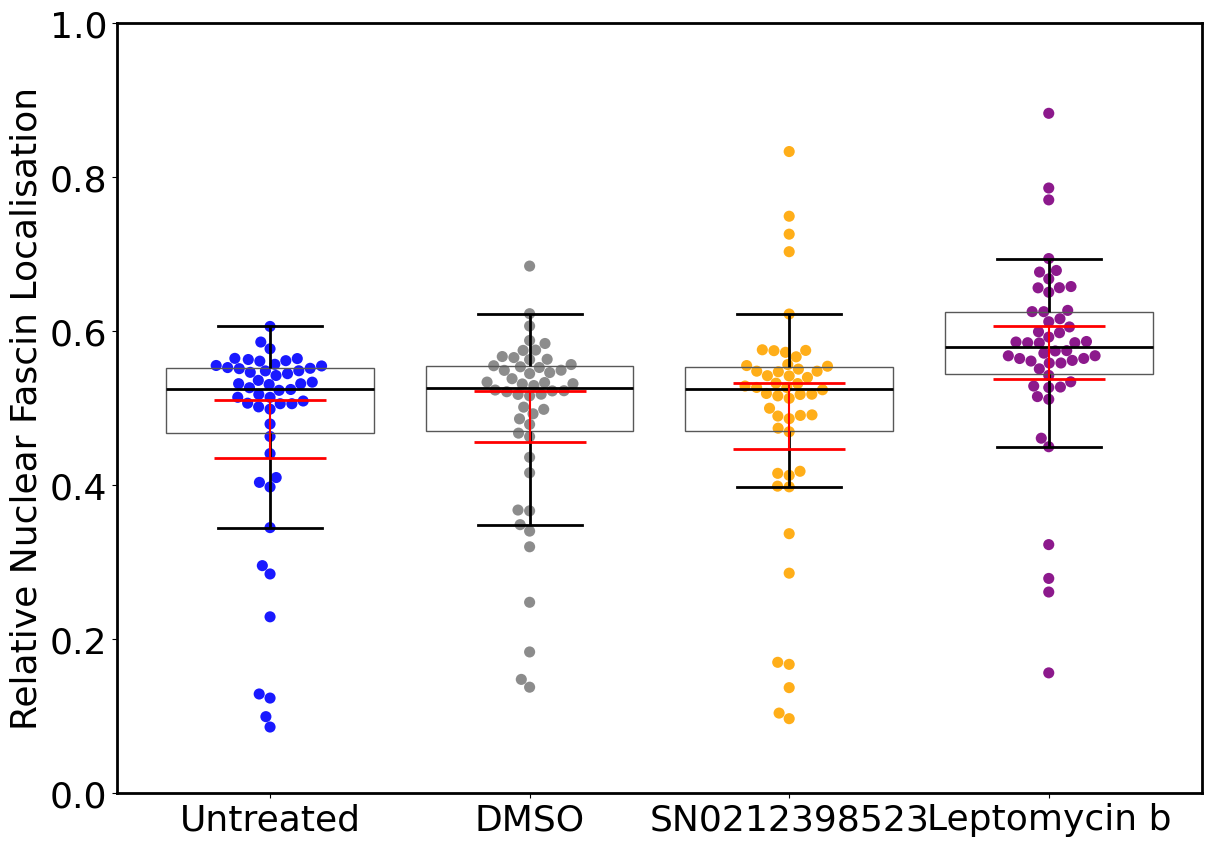

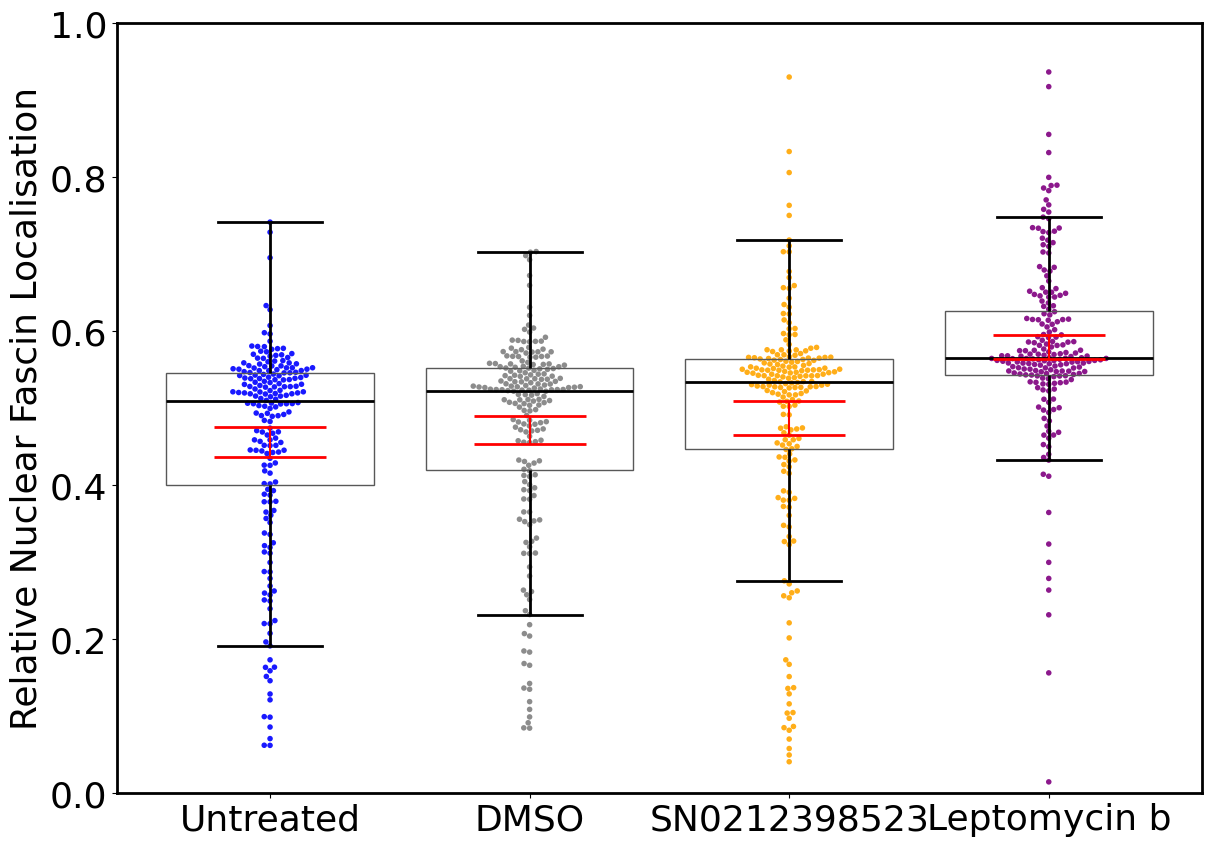

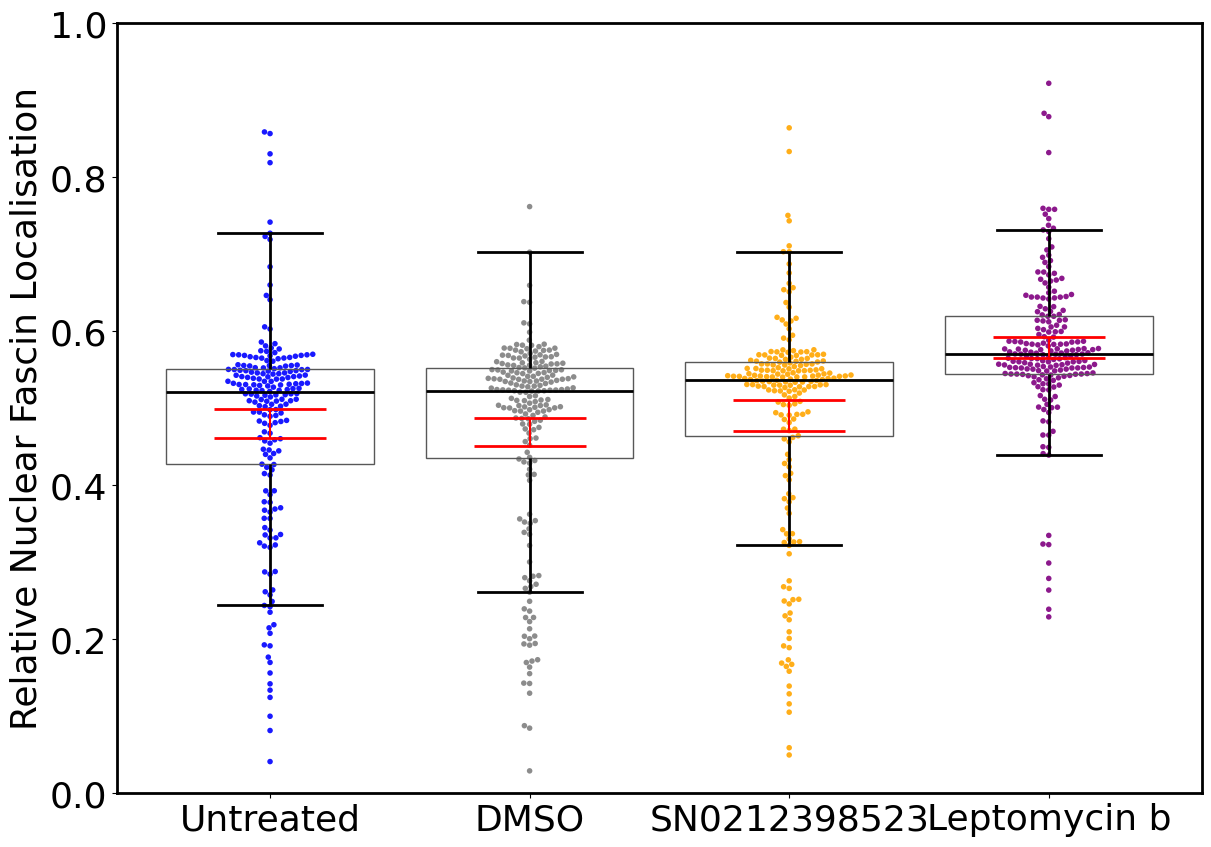

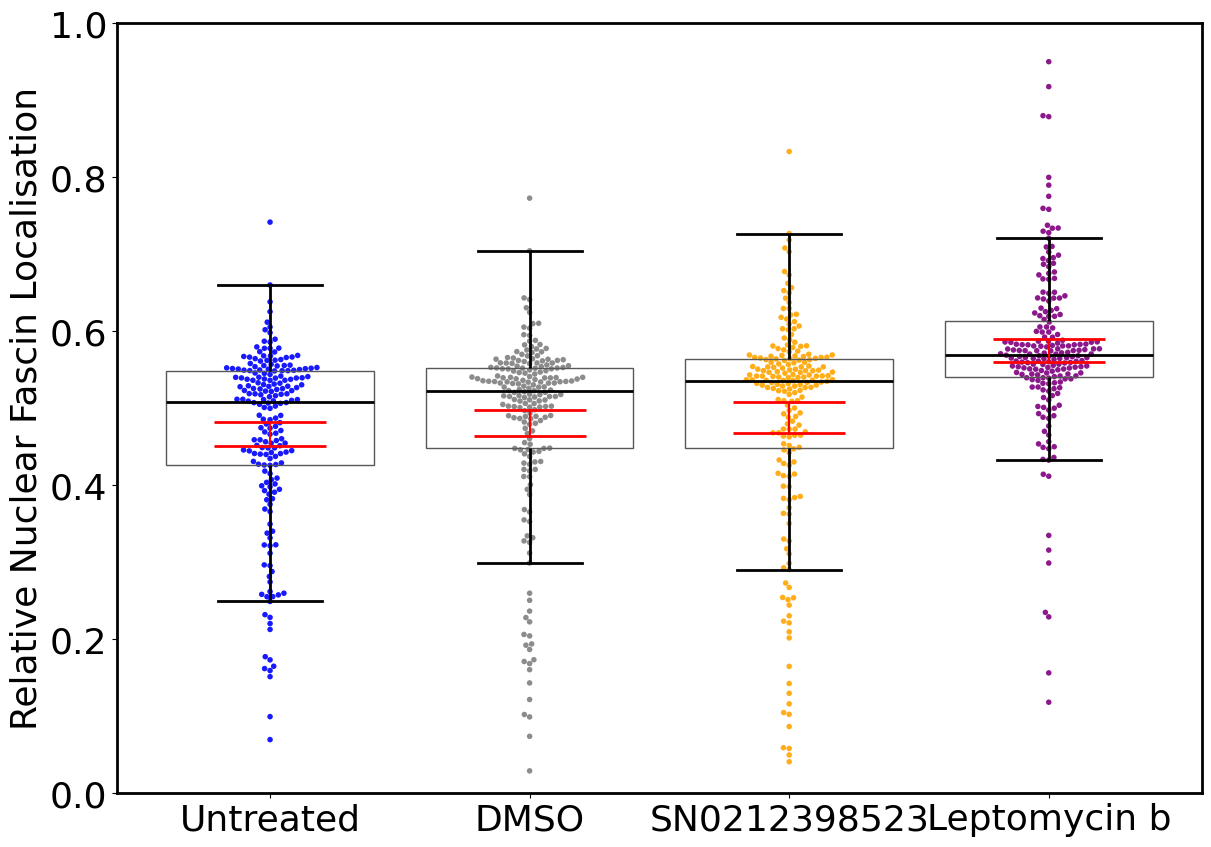

In [6]:
point_size = 8
random_seed = 42
for s in [50, 200]:
    if s > 50:
        point_size = 4
    for i in range(3):
        generate_swarmplot(['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b'], data_subset, color_dict,
                           treatment_col, variable_of_interest, y_label,
                           point_size=point_size, random_seed=random_seed, sample_size=s)
        random_seed = random_seed + 1

##### FIGURE 2 G - I

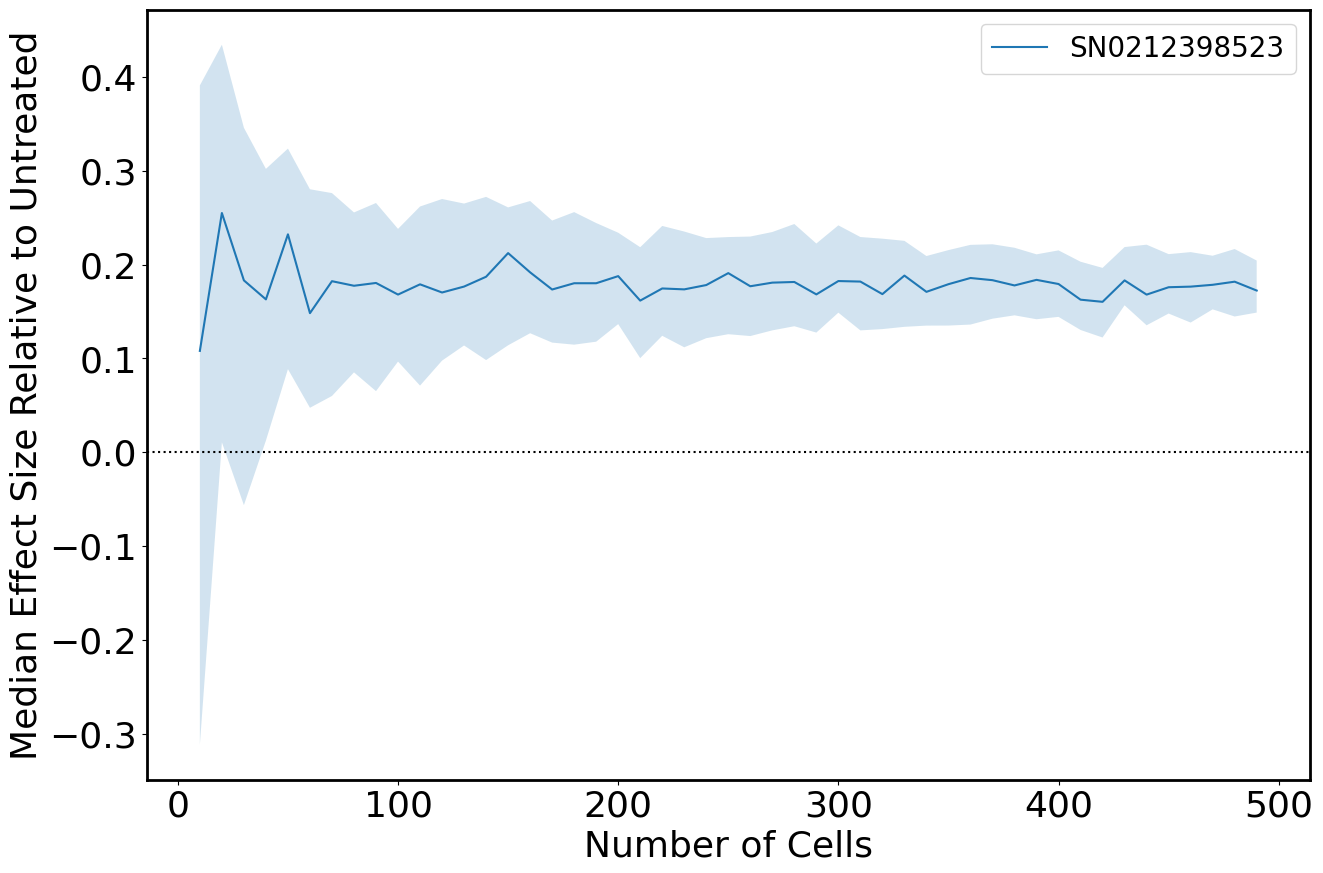

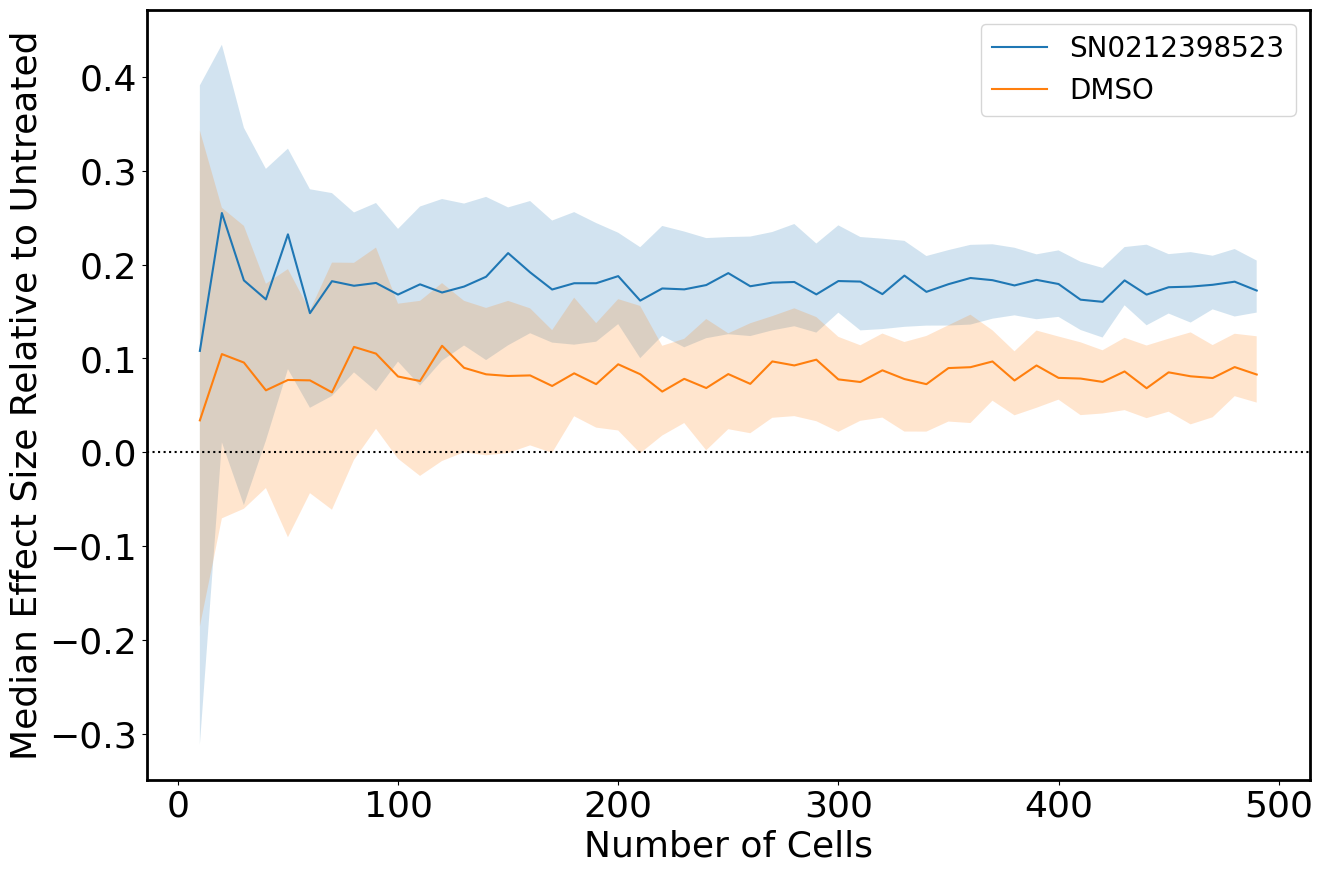

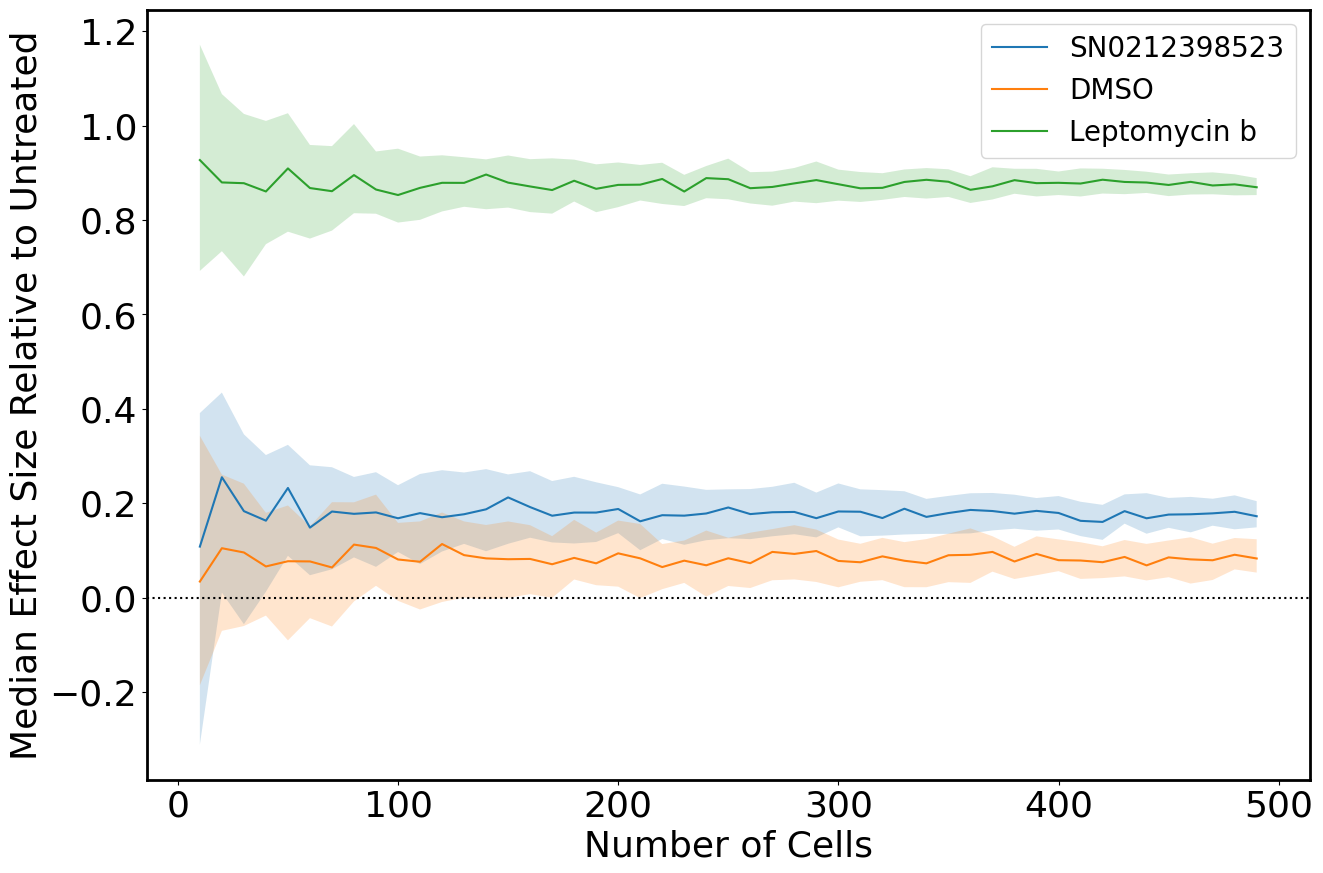

In [7]:
plot_effect_size_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                               'Median Effect Size Relative to Untreated', ['SN0212398523', 'DMSO', 'Leptomycin b'])

##### Figure 3A

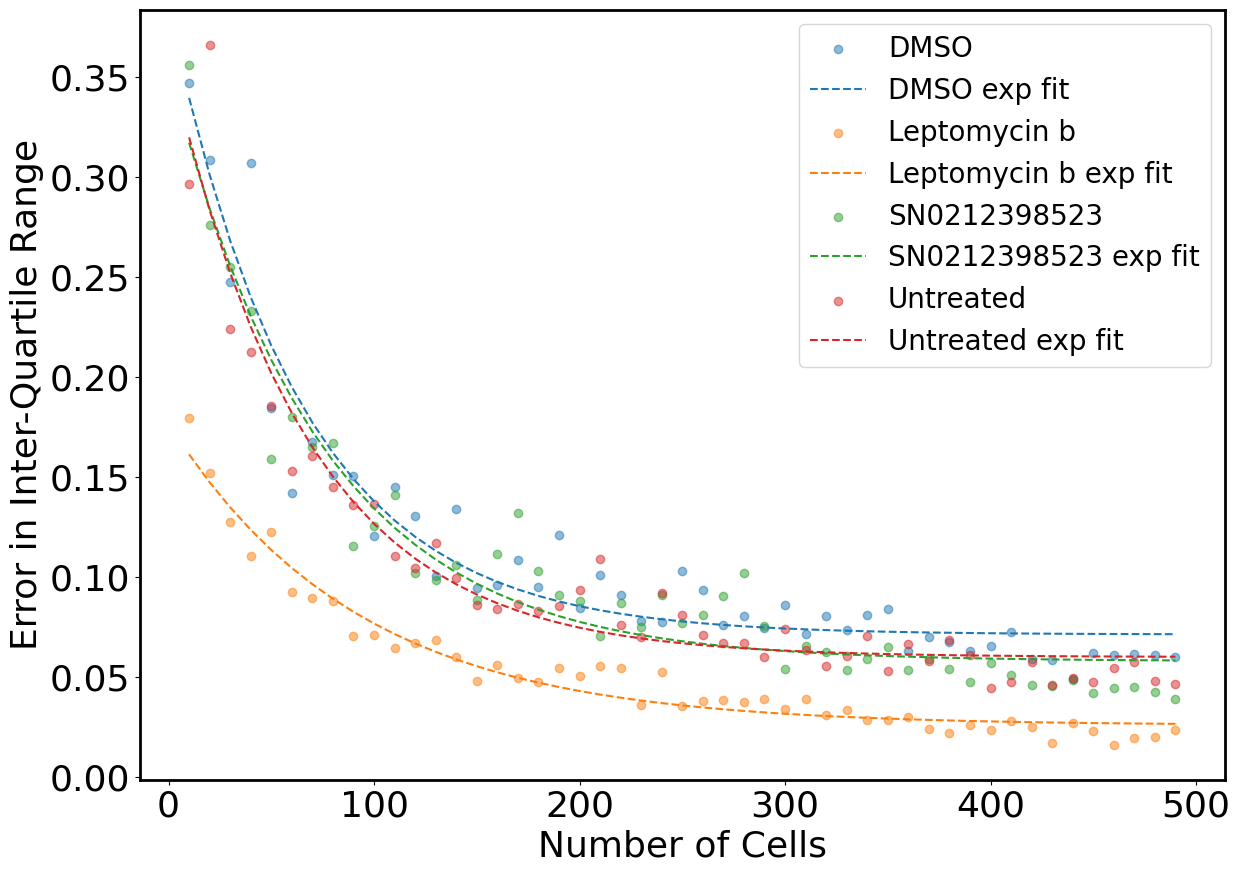

In [8]:
plot_iqr_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                       'Error in Inter-Quartile Range')

##### Figure 3B-H

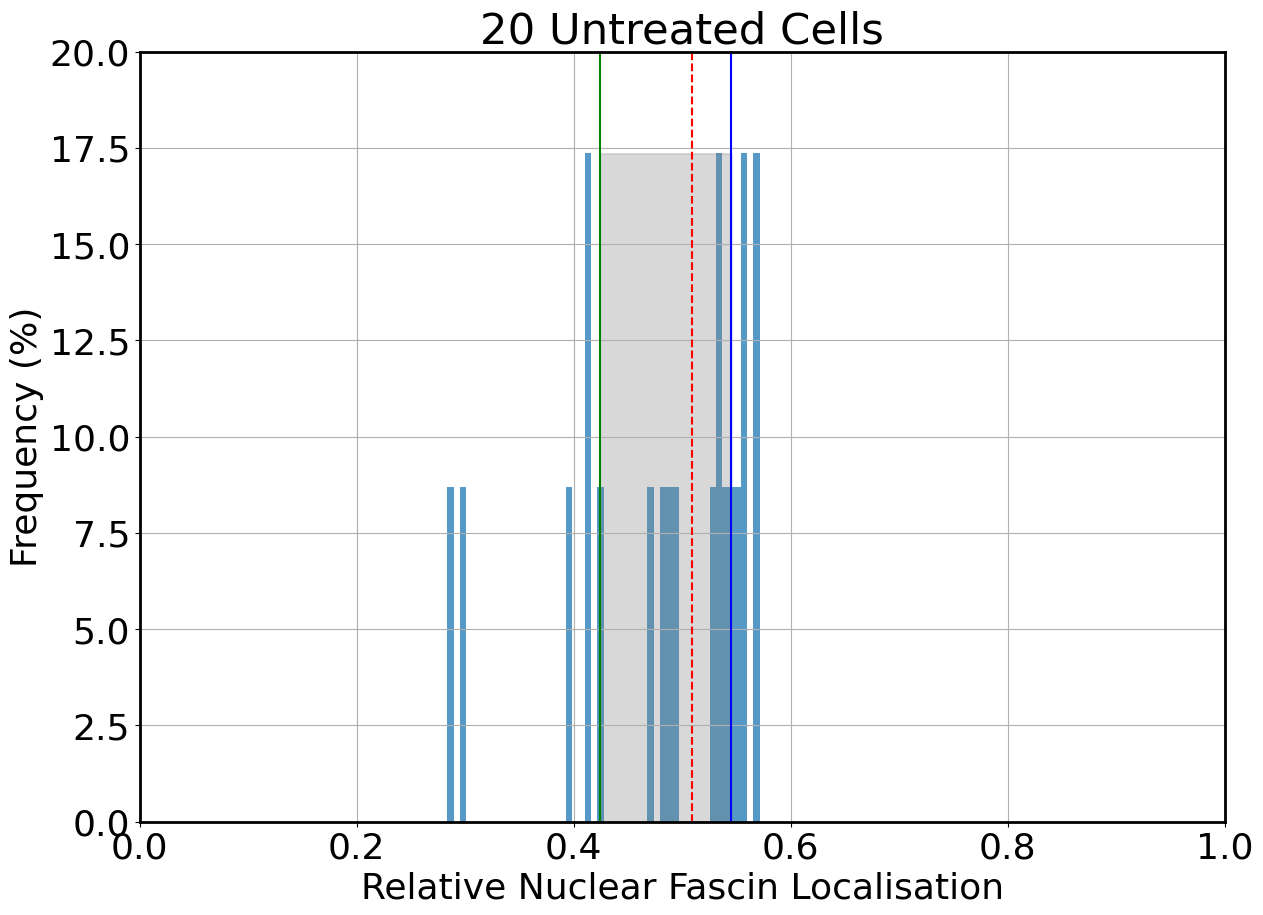

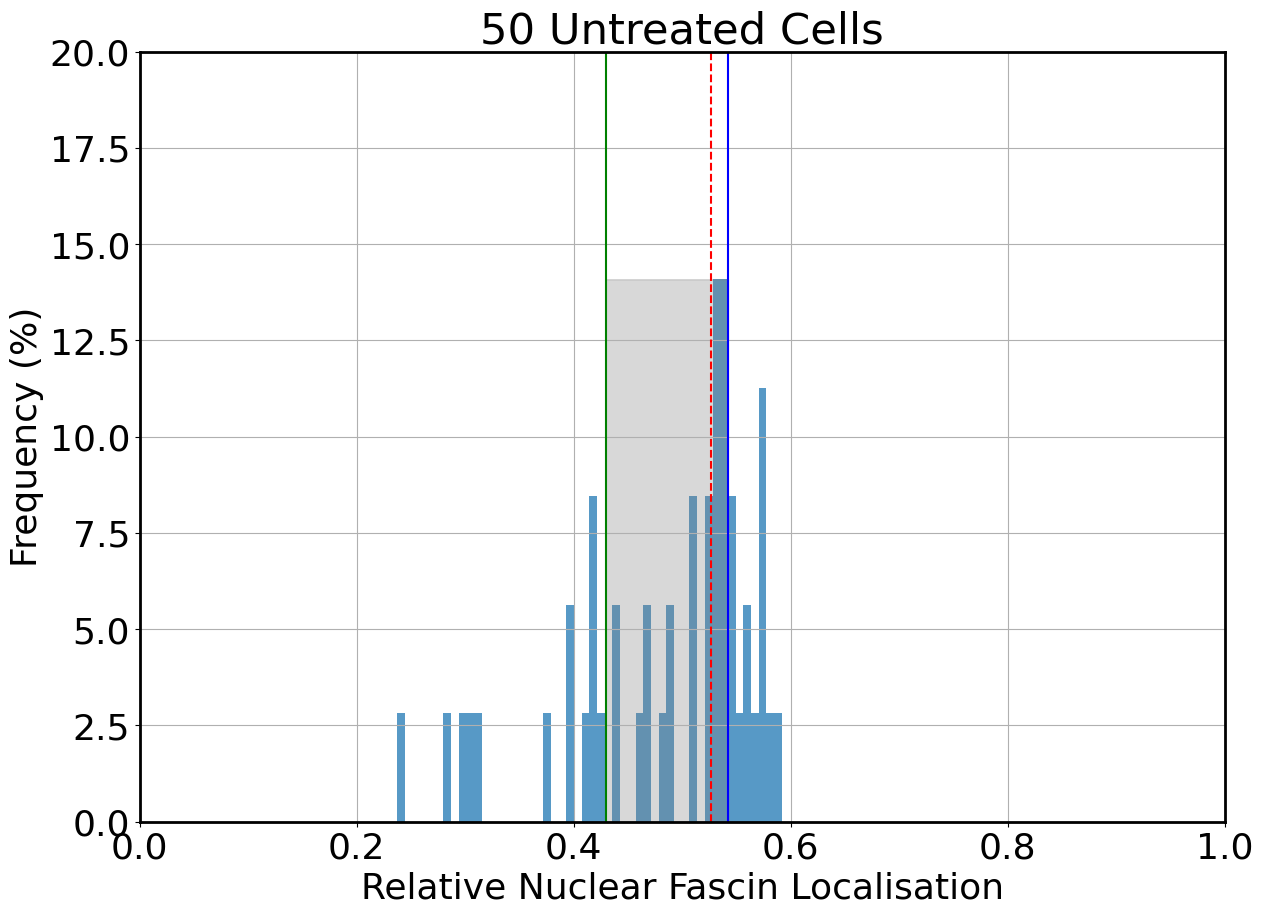

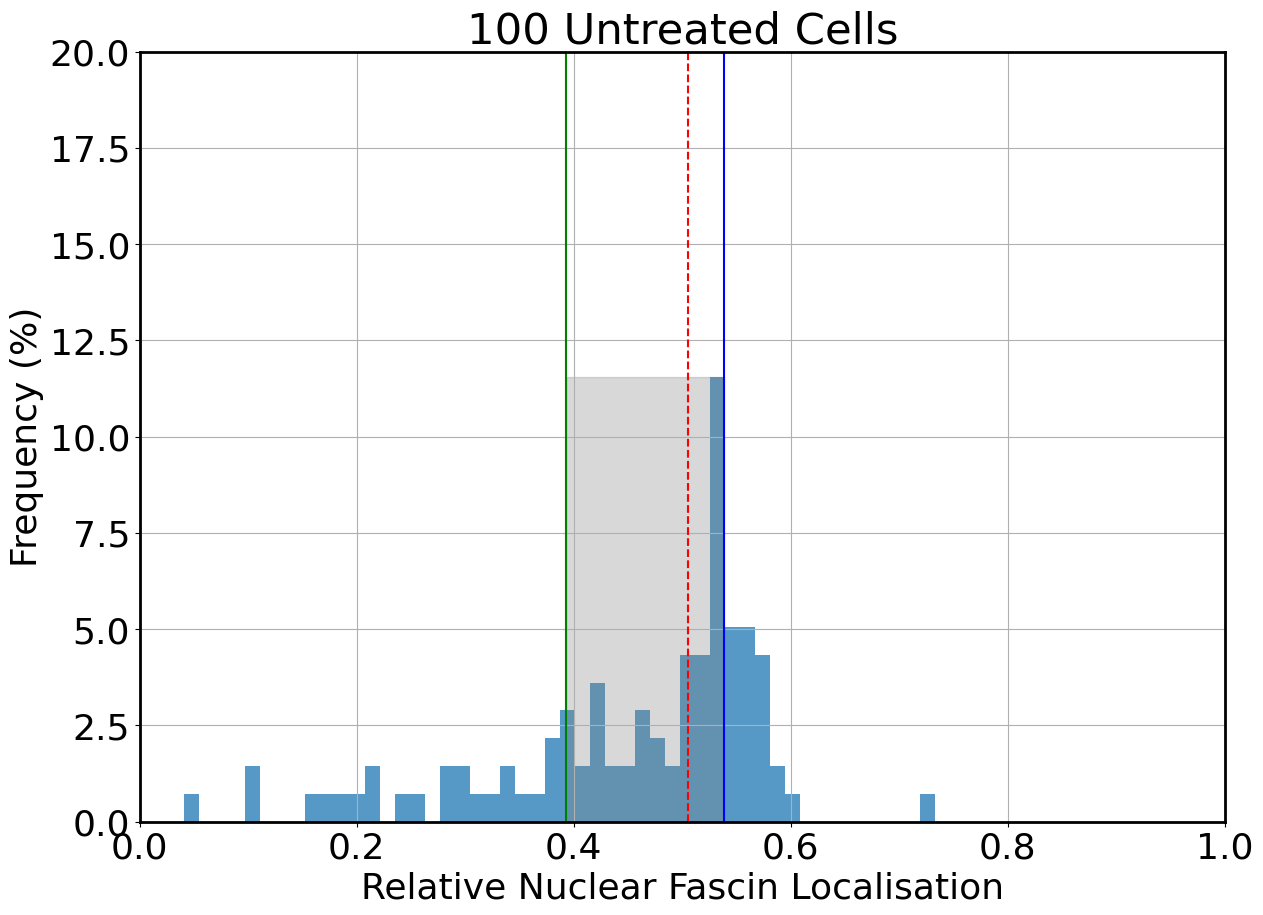

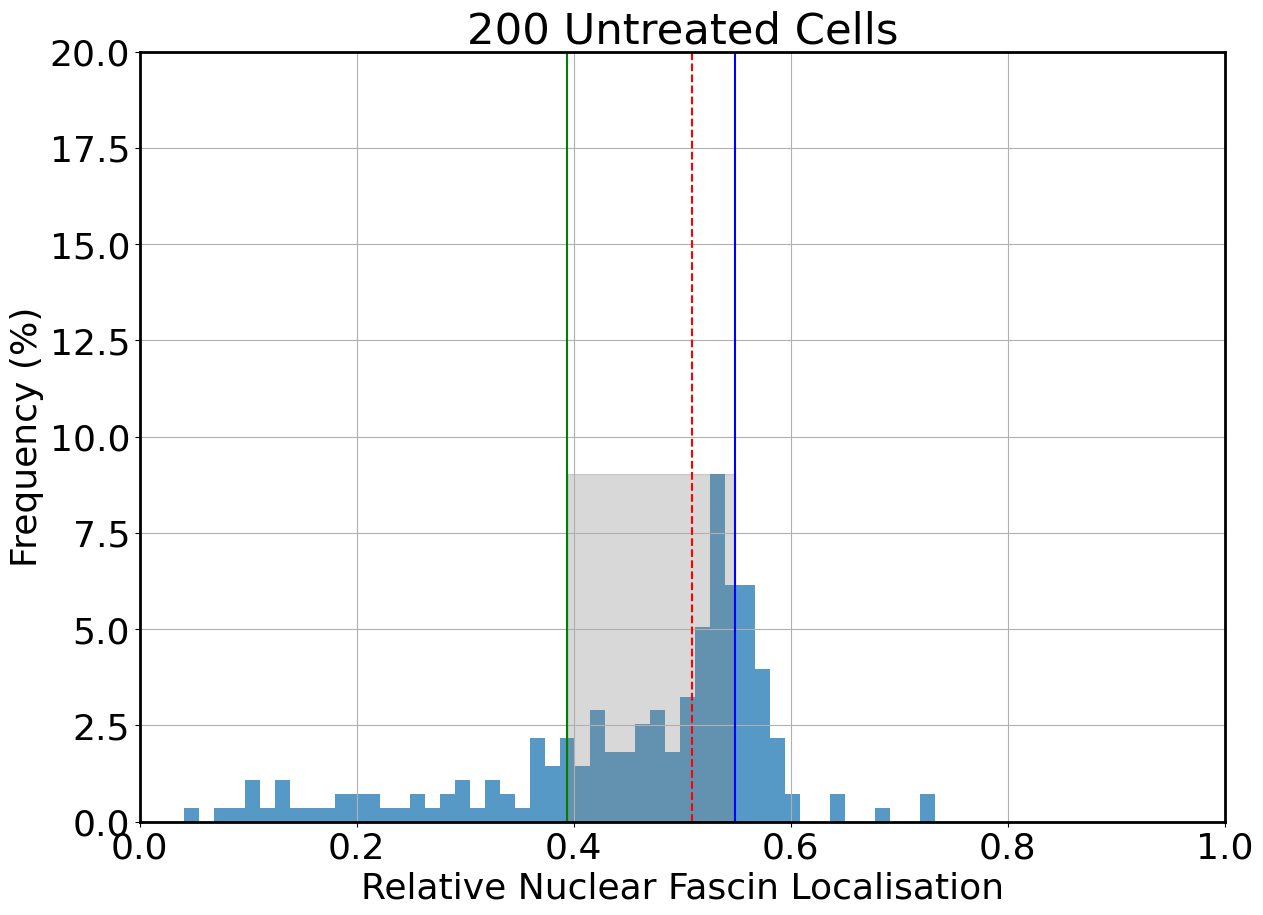

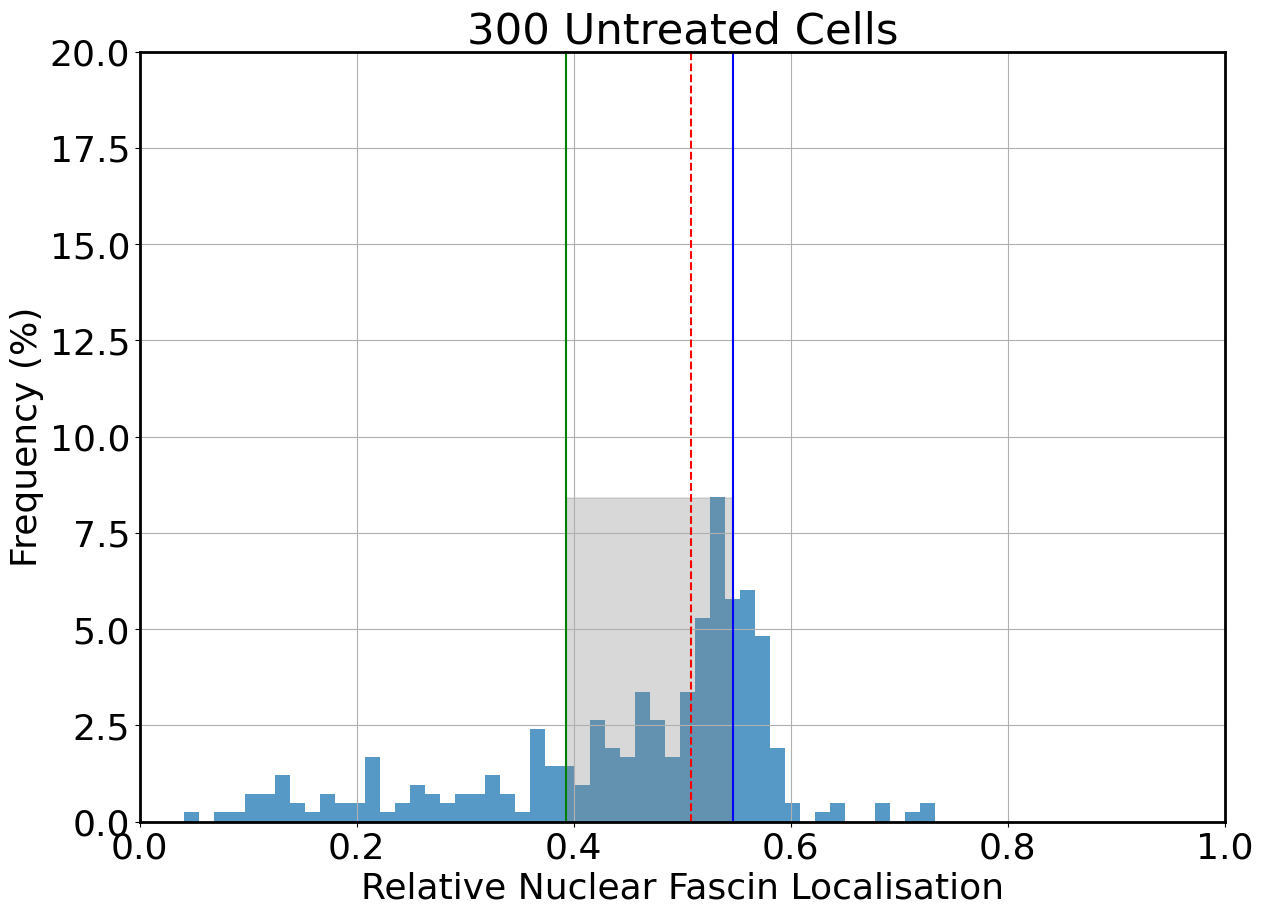

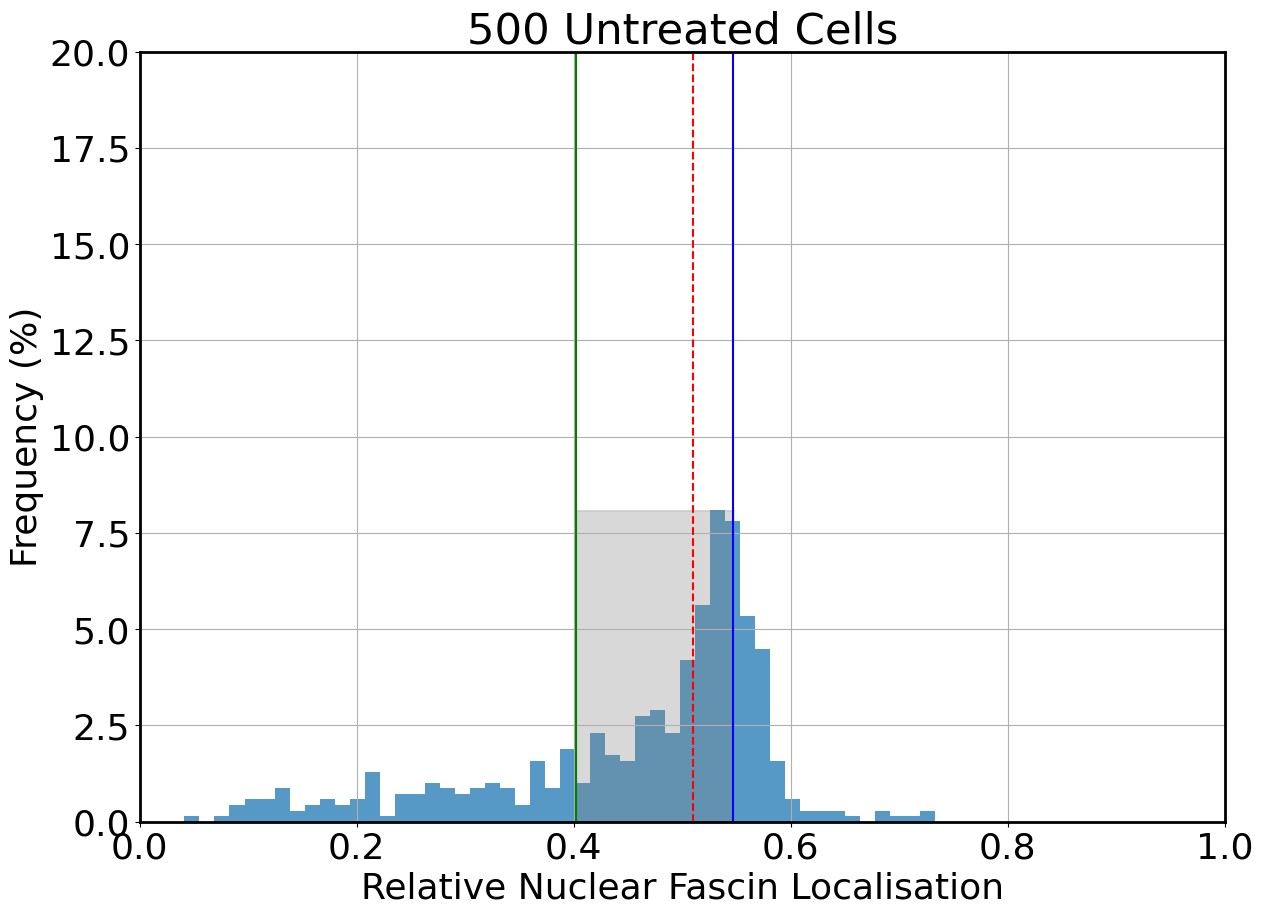

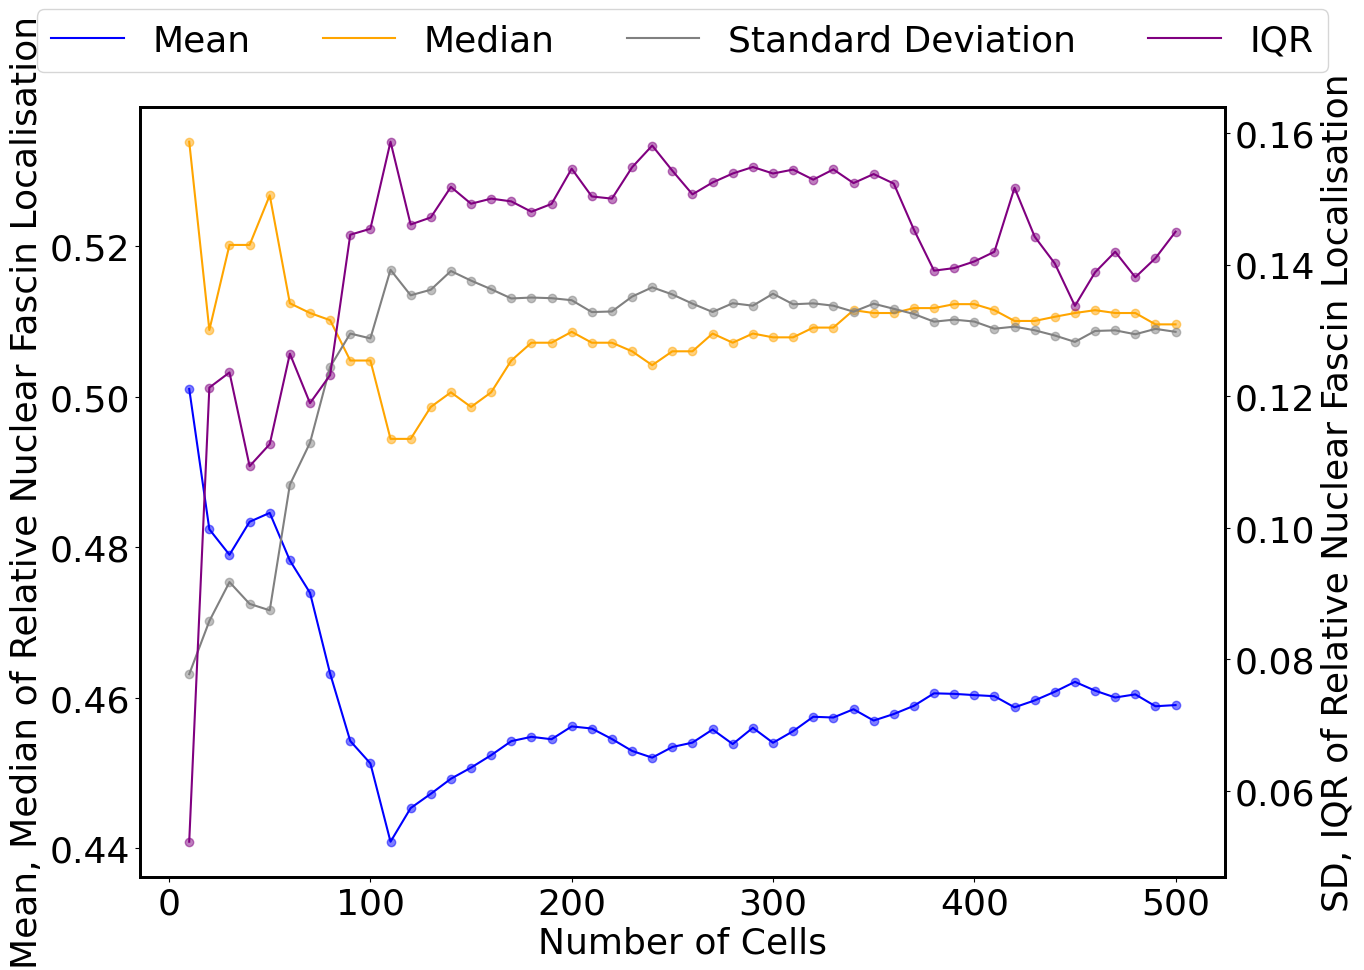

In [9]:
plot_cumulative_histogram_samples(data_subset, variable_of_interest, treatment_col, 'Untreated', y_label)

##### Figure 4A-C

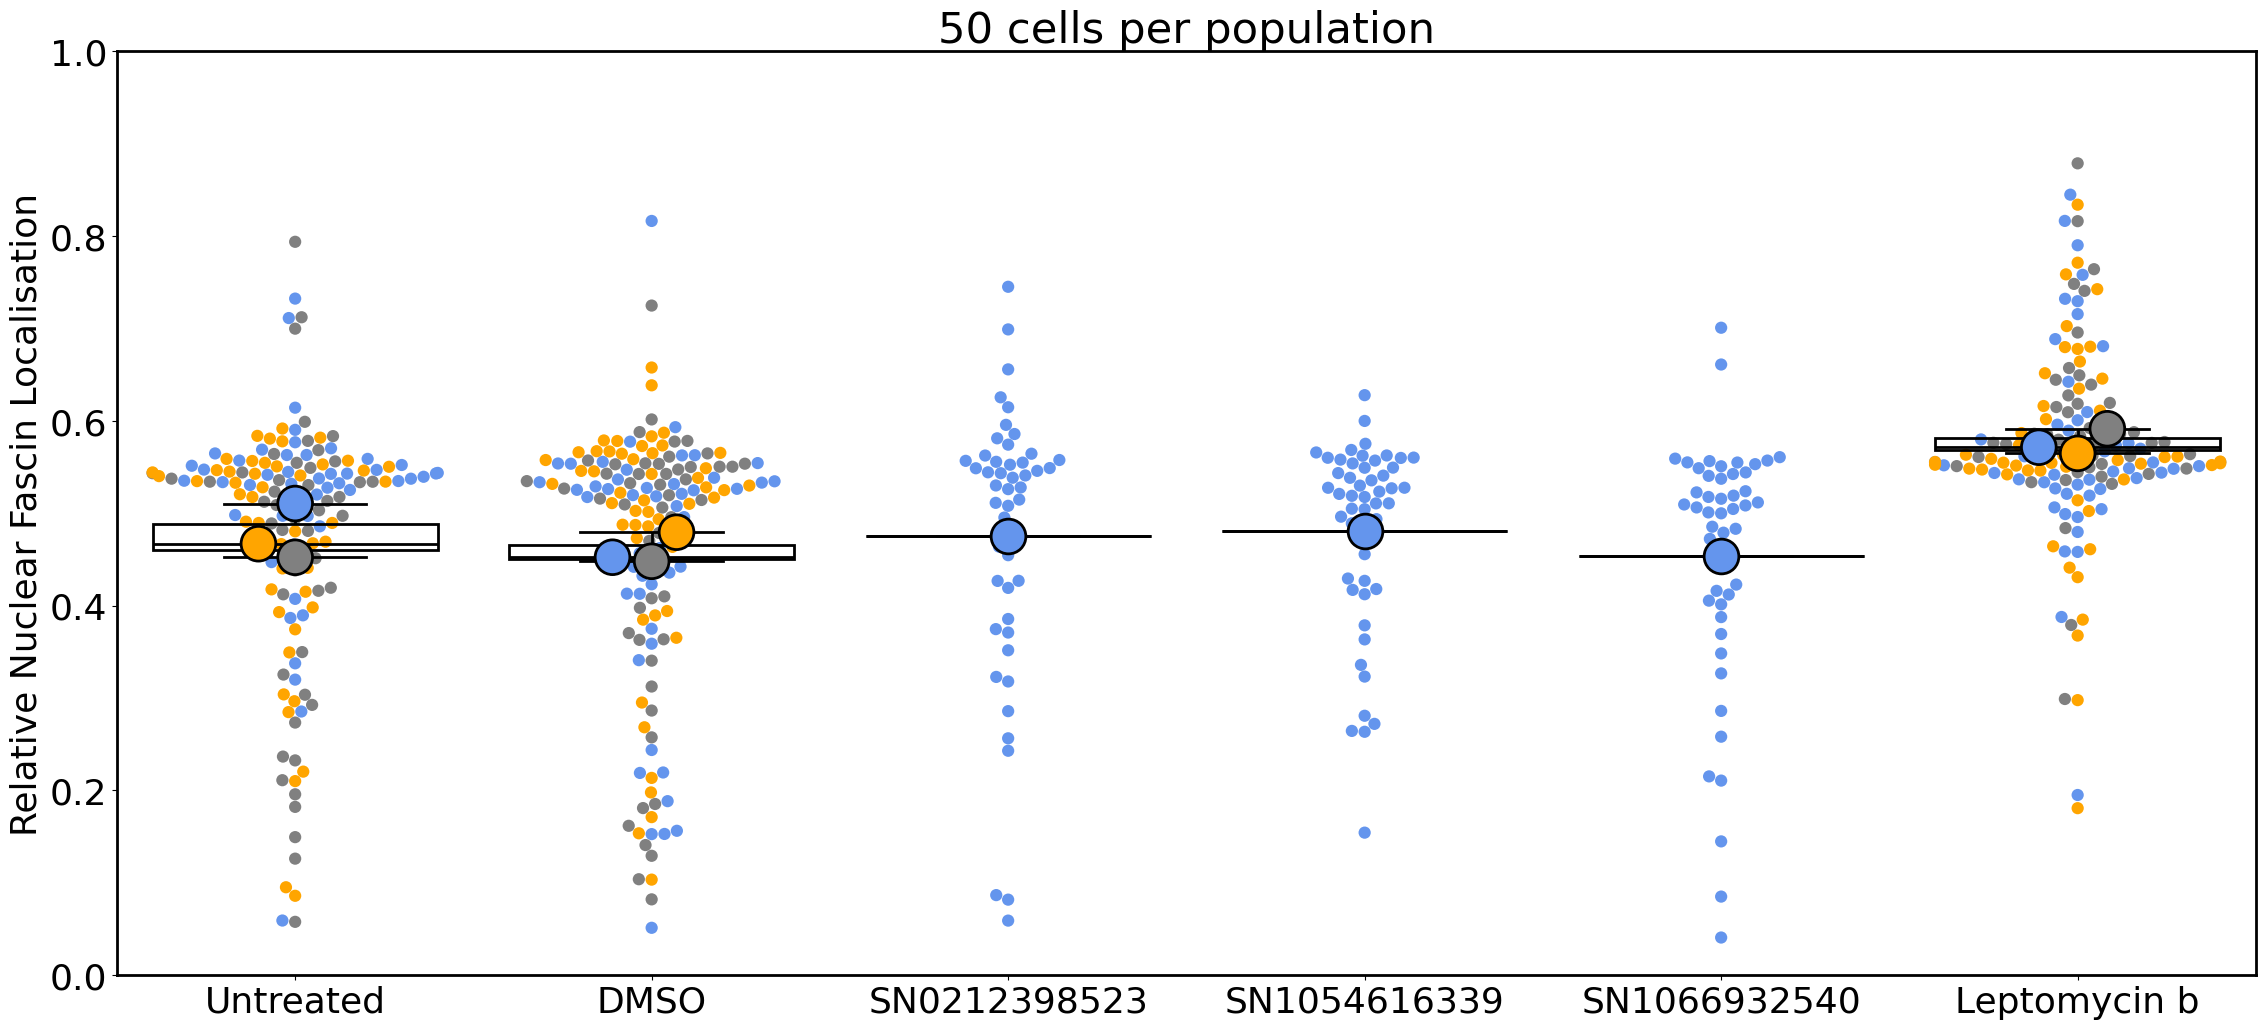

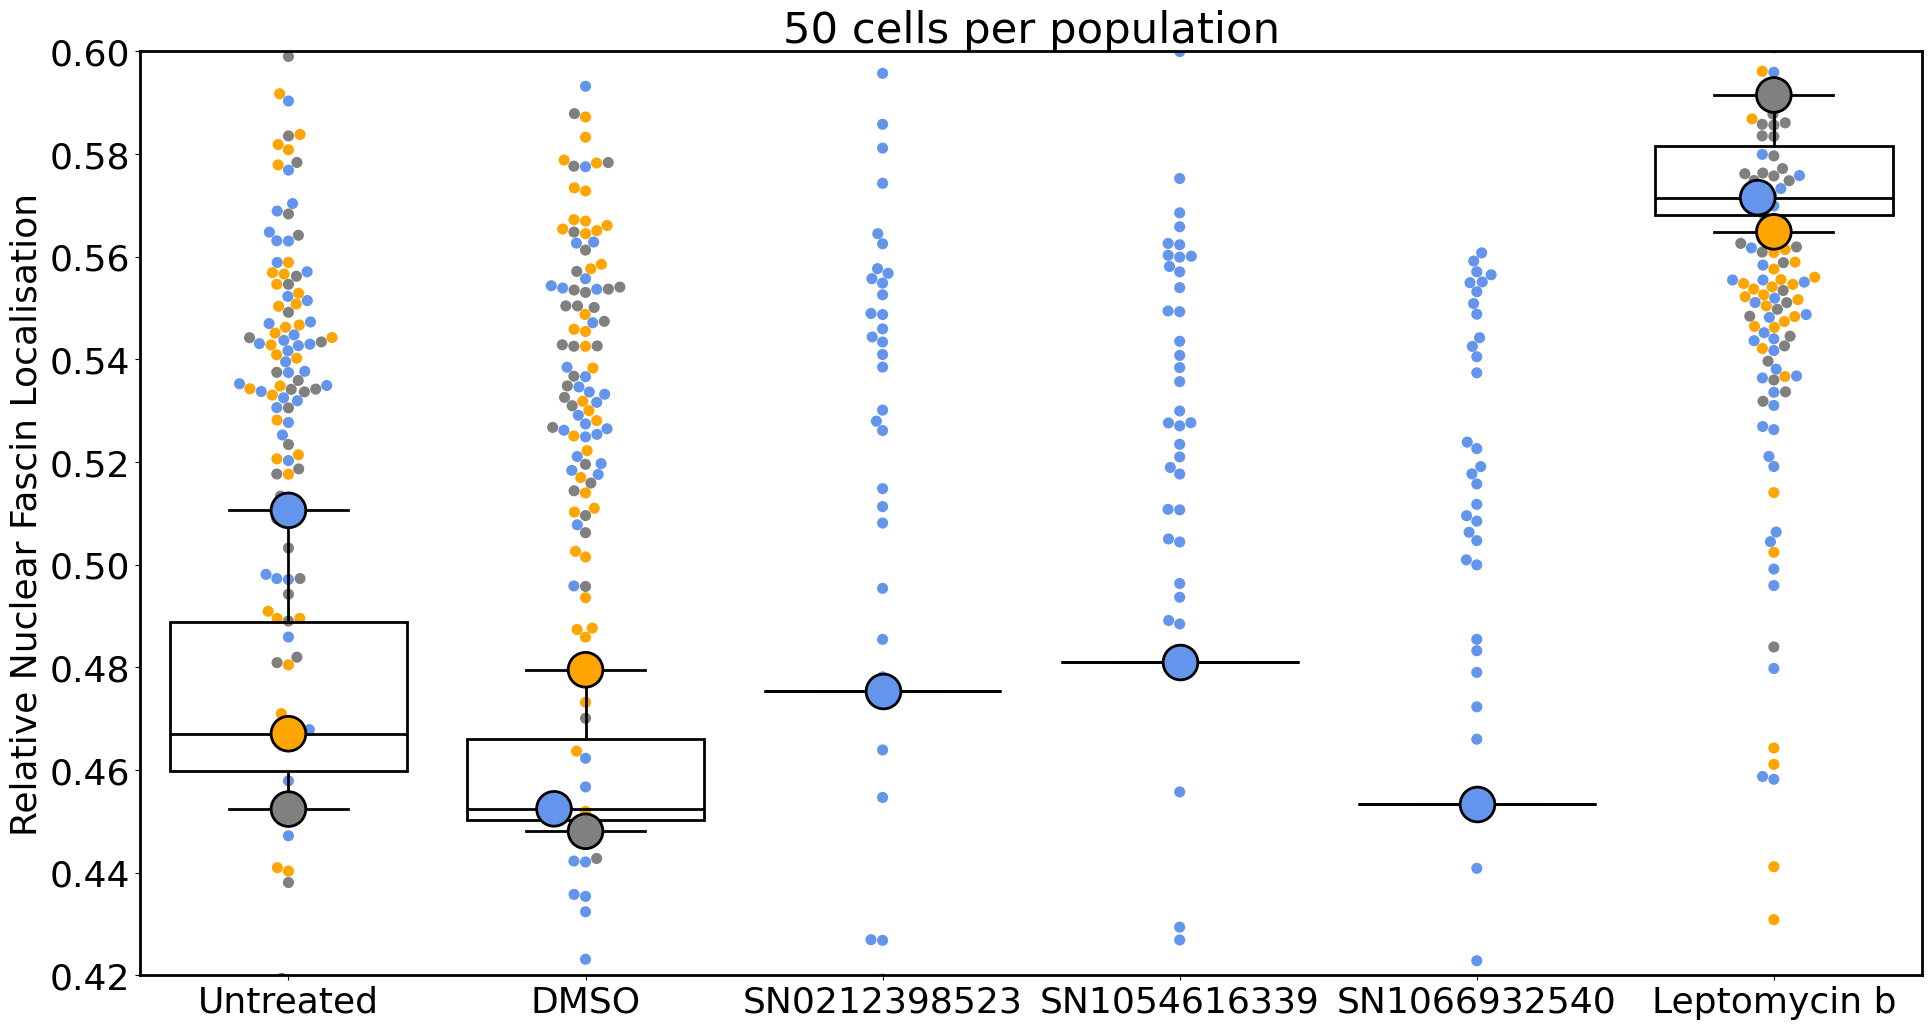

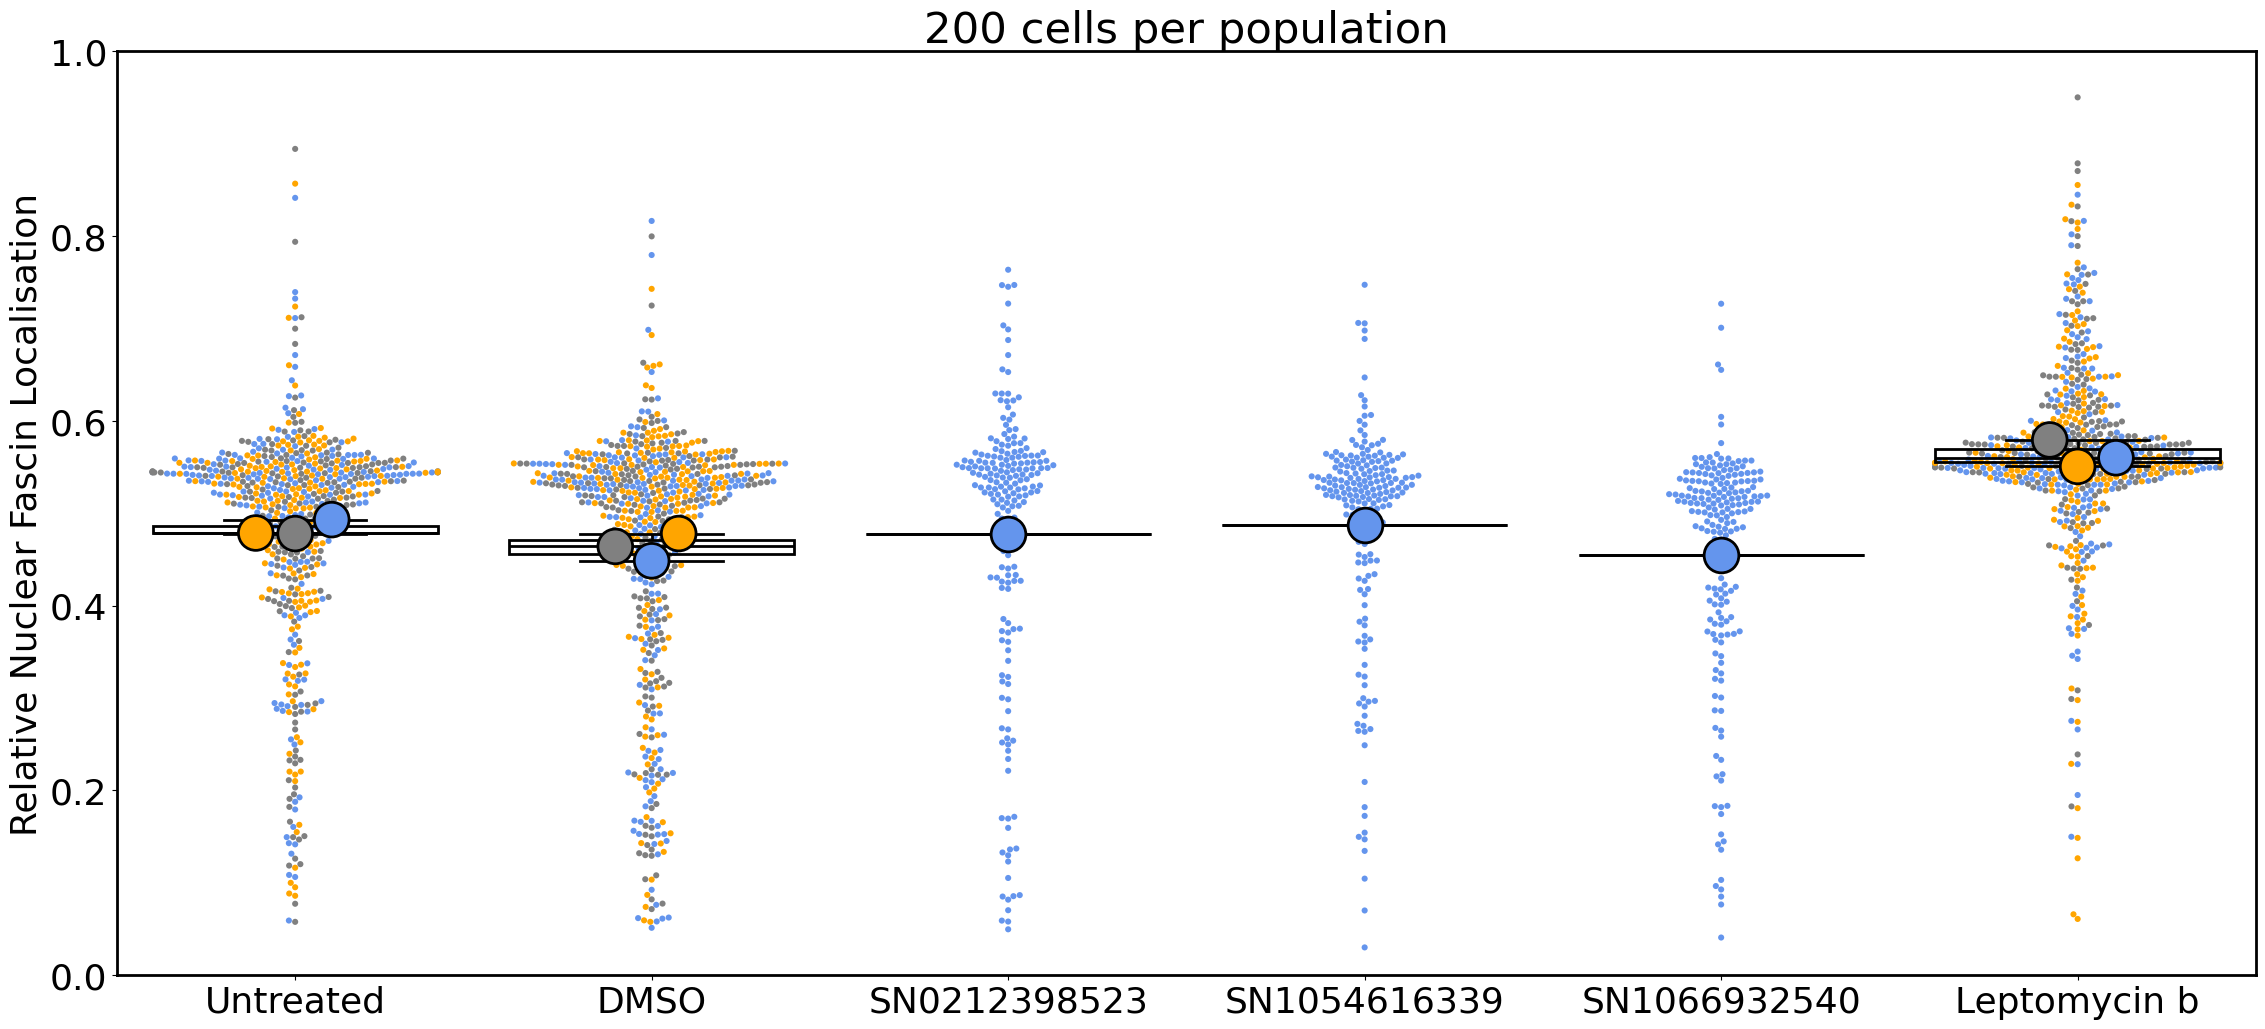

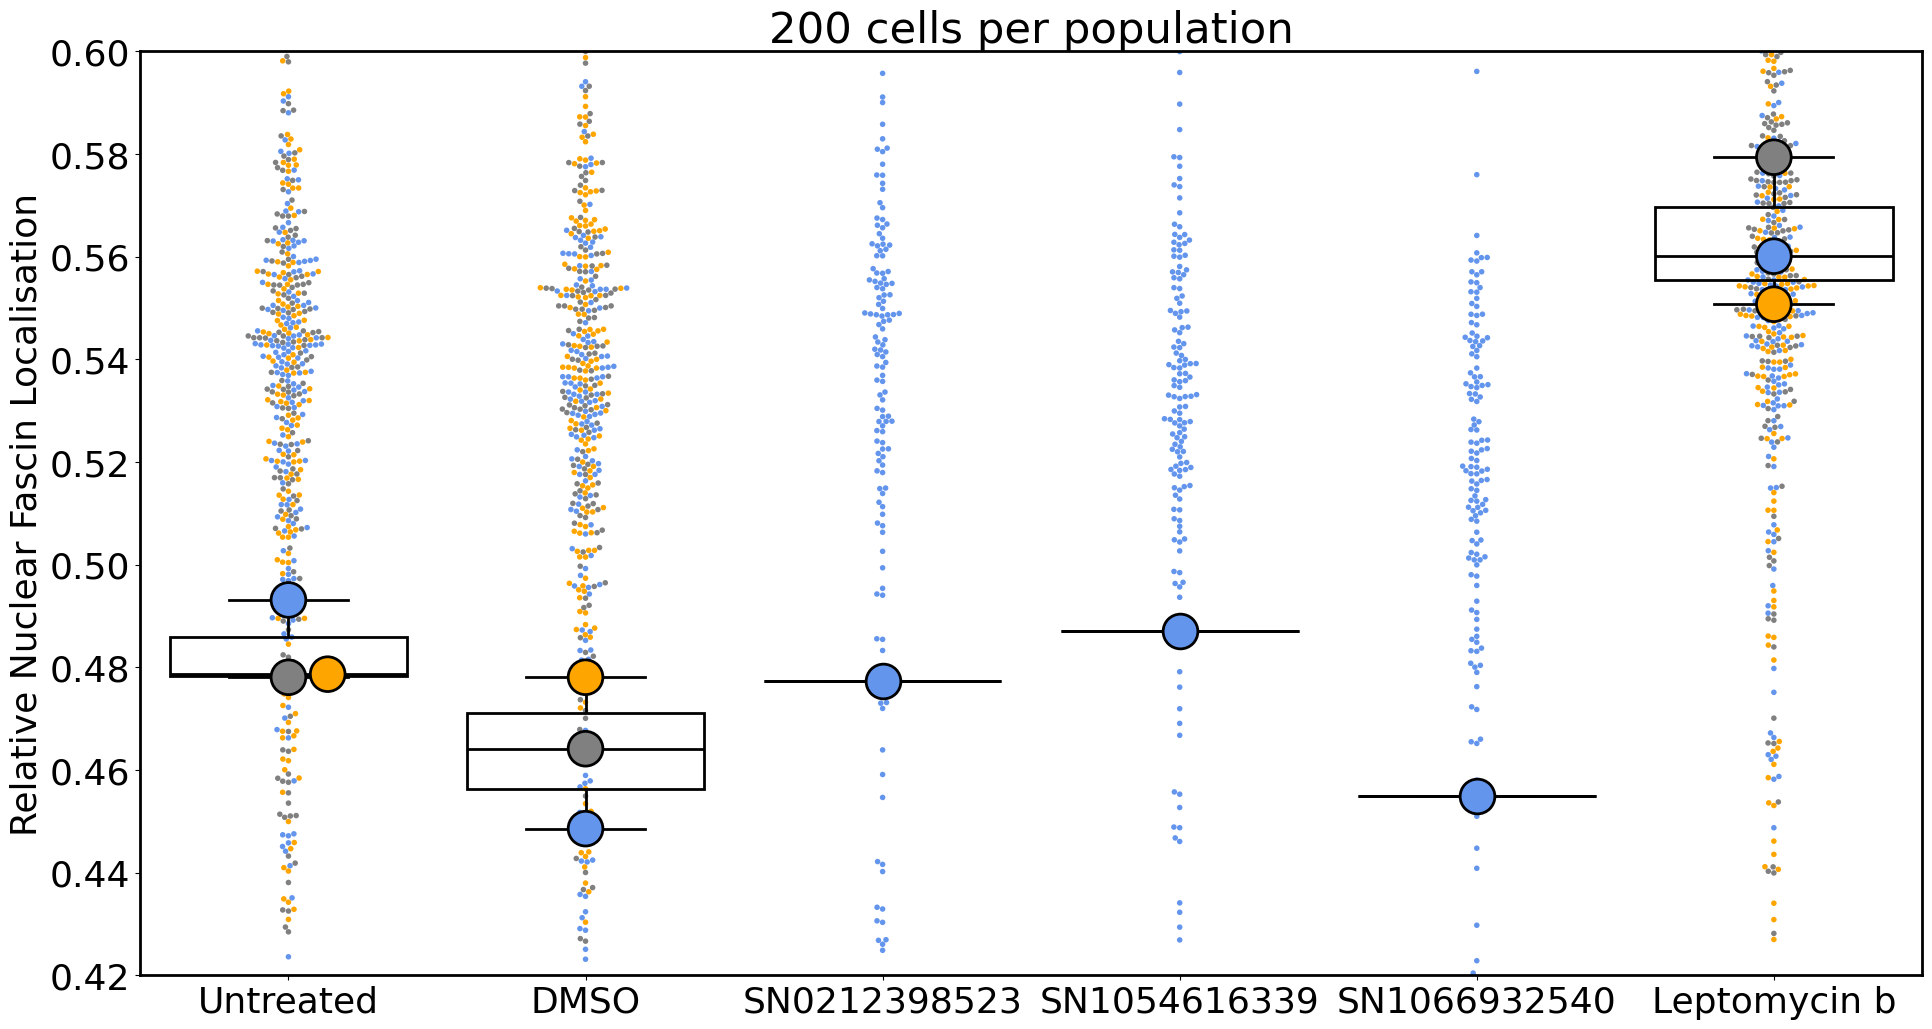

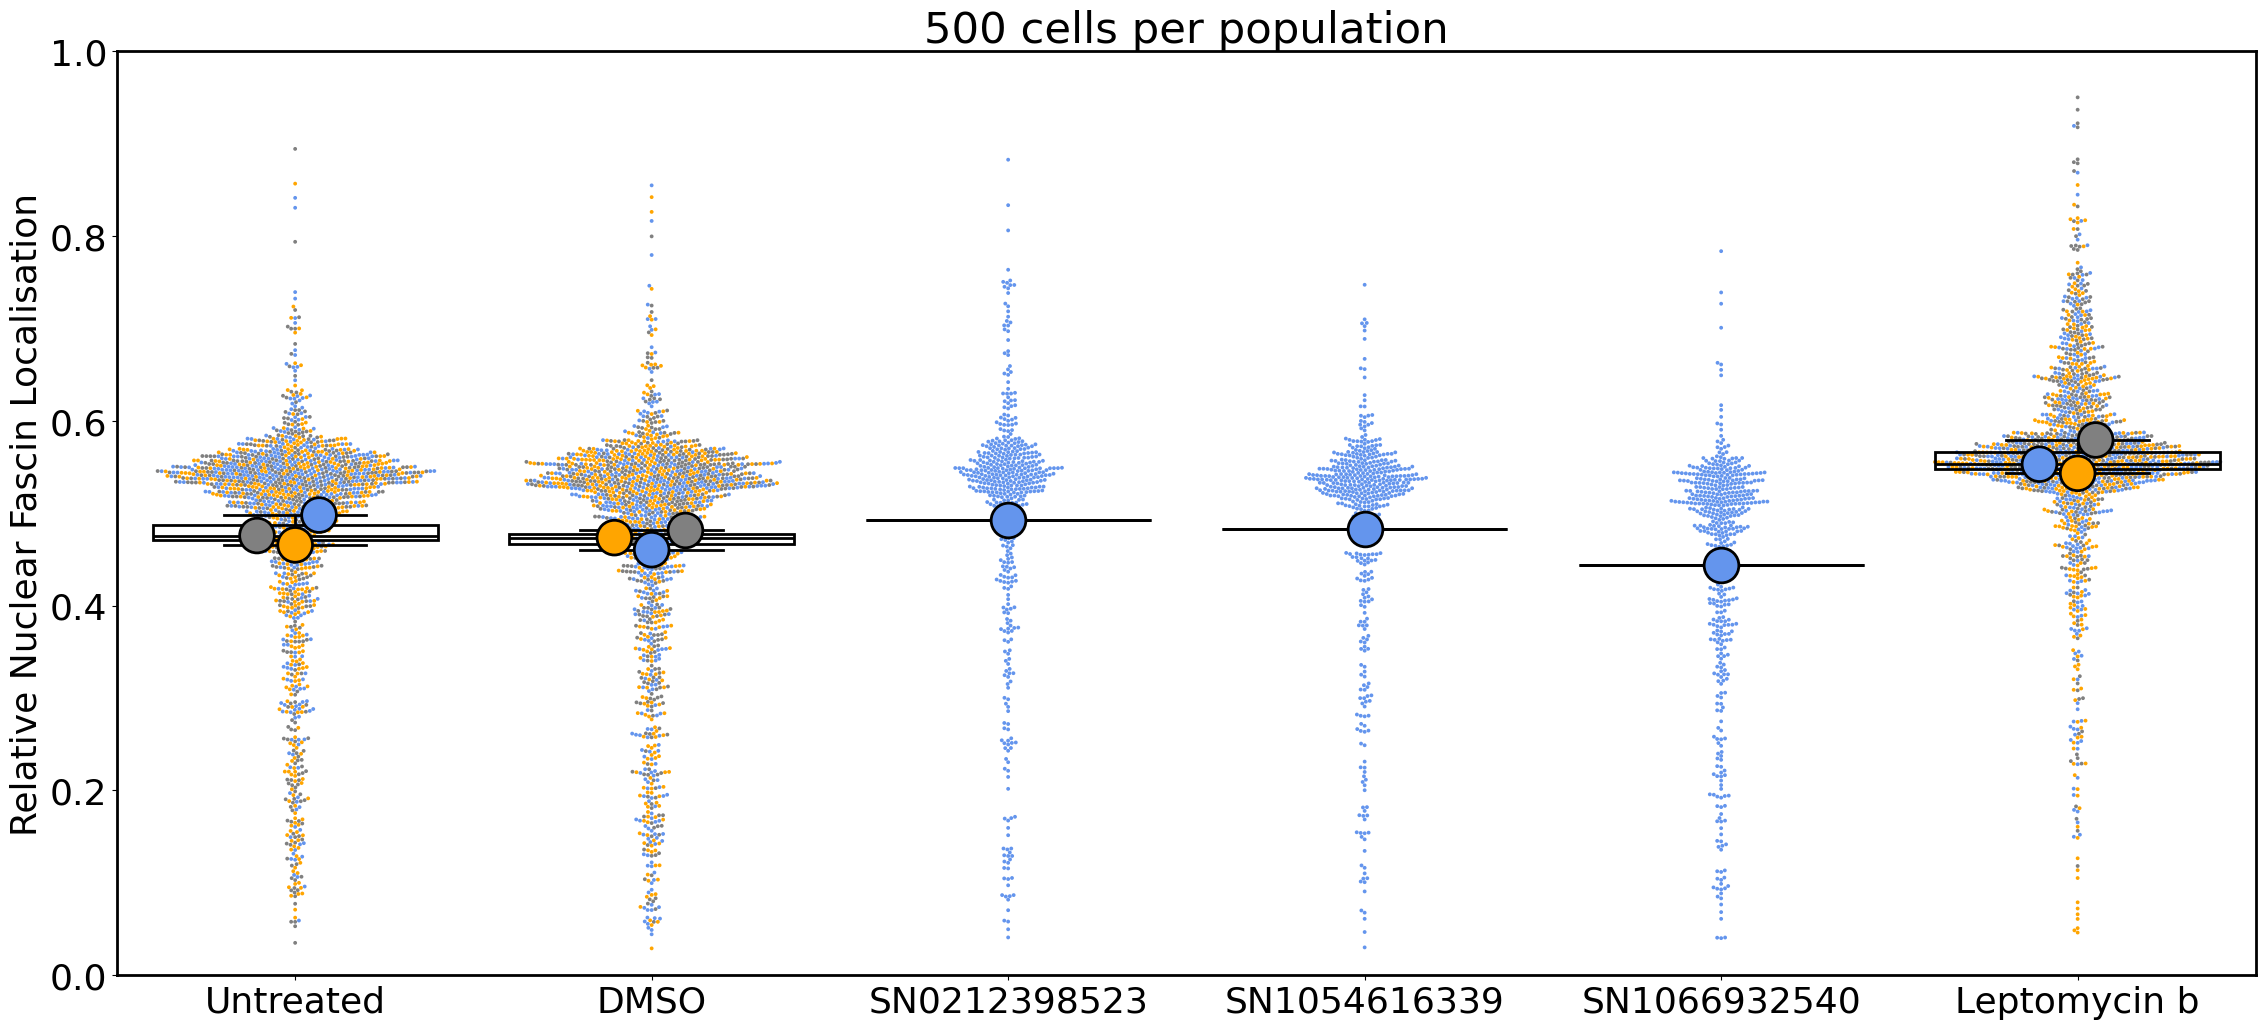

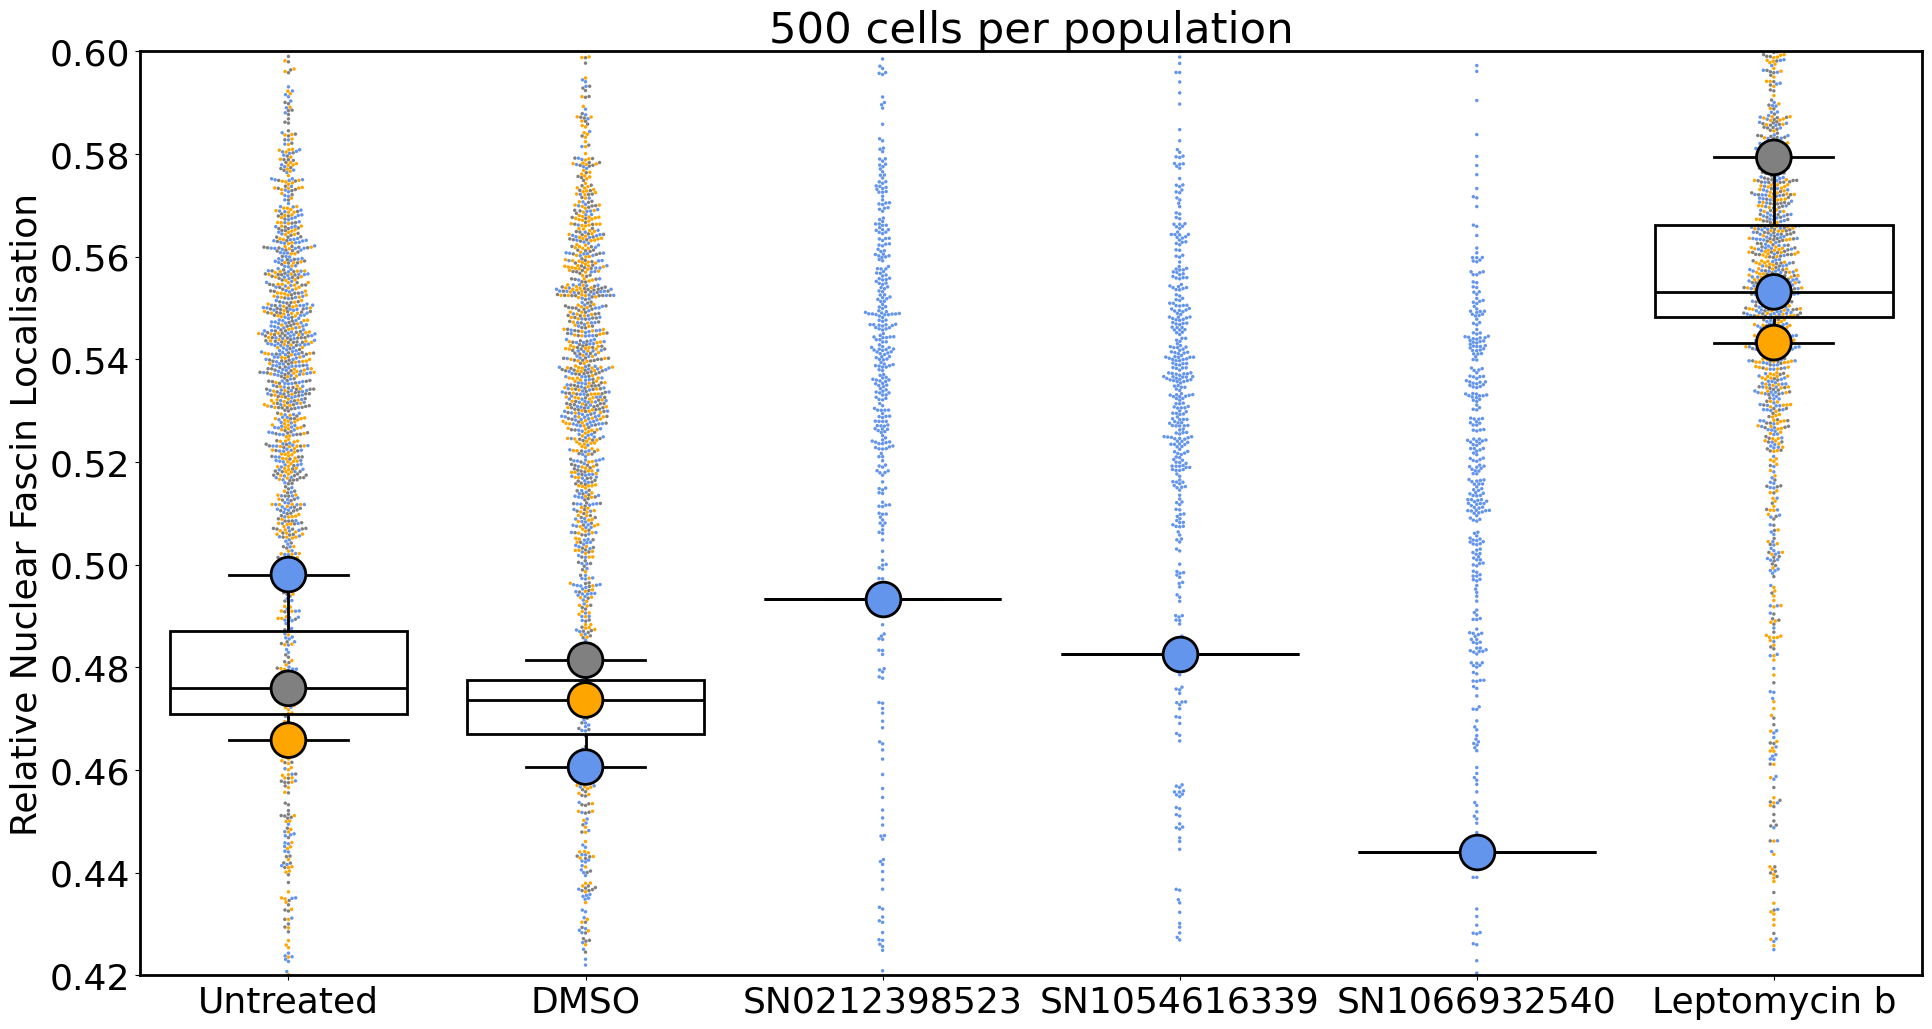

In [10]:
selected_treatments = ['Untreated', 'DMSO', 'SN0212398523', 'SN1054616339', 'SN1066932540', 'Leptomycin b']
point_size = {50: 8, 200: 4, 500: 2.5}
for s in [50, 200, 500]:
    generate_superplot(selected_treatments, selected_treatments,
                       prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds,
                                    compounds,
                                    ['J05', 'I19', 'G15', 'O02', 'B02', 'N12', 'L08', 'L18', 'H13', 'E22',
                                     'H10', 'B06']), color_dict, treatment_col, variable_of_interest,
                       y_label, sample_size=s, point_size=point_size[s])

##### Supplementary Figure 1

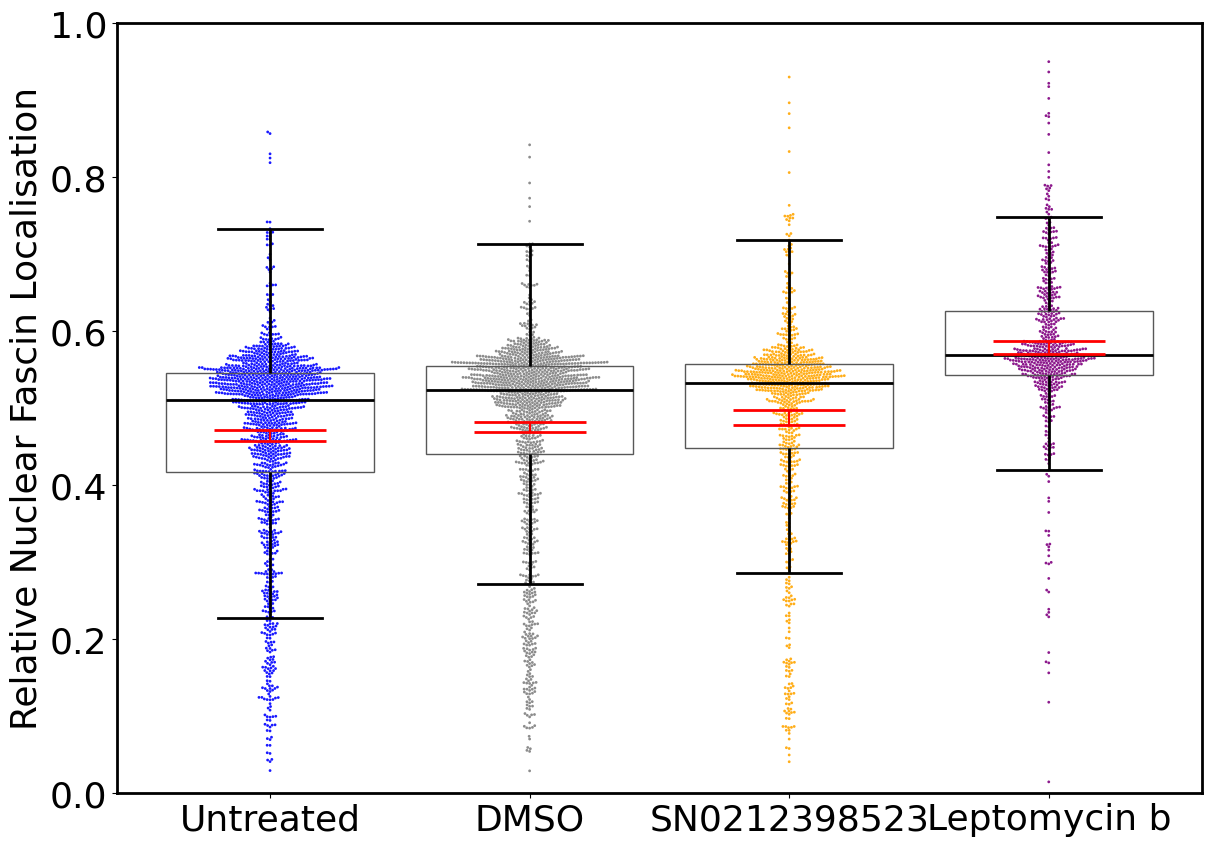

In [11]:
generate_swarmplot(['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b'], data_subset, color_dict, treatment_col,
                   variable_of_interest, y_label, p_values=True)